In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Epoch [100/250], Loss: 8.045852155191824e-06
Epoch [200/250], Loss: 0.006082025822252035


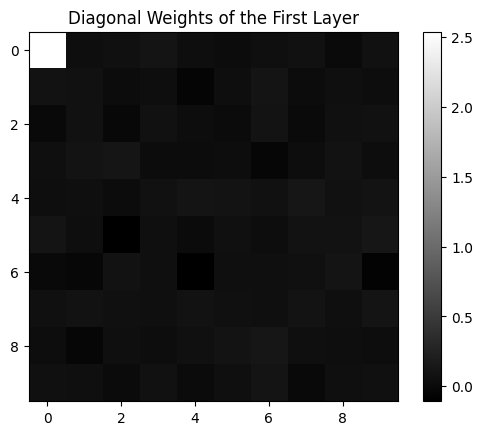

In [37]:
# Data generation


def generate_points(N=1000, d=100):
    np.random.seed(14)
    return np.random.normal(0, 1, (N, d))


def get_labels(X):
    # Labels based on the sum of the first two features
    return X[:, 0]

# Neural Network Model


class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=1024, depth=1):
        super(SimpleNN, self).__init__()
        layers = []

        # First layer
        first_layer = nn.Linear(input_dim, hidden_dim, bias=False)
        layers.append(first_layer)
        layers.append(nn.ReLU())

        first_layer.weight.data[:, :] = 0.1
        first_layer.weight.data[0, 0] = 1

        # Additional hidden layers
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim, bias=False))
            layers.append(nn.ReLU())

        # Output layer
        layers.append(nn.Linear(hidden_dim, 1, bias=False))

        # Combine all layers into a Sequential module
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

# Training Function


def train_model(model, train_loader, num_epochs=200, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


# Data Preparation
X = generate_points(N=1000, d=100)
y = get_labels(X)

X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y).unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2)
train_loader = DataLoader(TensorDataset(
    X_train, y_train), batch_size=100, shuffle=True)

# Model Initialization
model = SimpleNN(input_dim=100)

# Training
train_model(model, train_loader, num_epochs=250, lr=0.01)


# Assuming the model 'model' has been trained, and the weights are from the first layer
W_1 = model.layers[0].weight.data

# Extract the diagonal weights and reshape them into a 10x10 matrix
# Since the model has 1024 units in the hidden layer, we only take the first 100 weights
diagonal_weights = W_1[:, :100].diag().reshape(10, 10).cpu().numpy()

# Display the weights as a 10x10 greyscale image
plt.imshow(diagonal_weights, cmap='gray')
plt.colorbar()
plt.title("Diagonal Weights of the First Layer")
plt.show()